<a href="https://colab.research.google.com/github/jembi/mpi-toolkit-notebook/blob/MPIT_127/data-generator/GECO-Kenya/Generate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

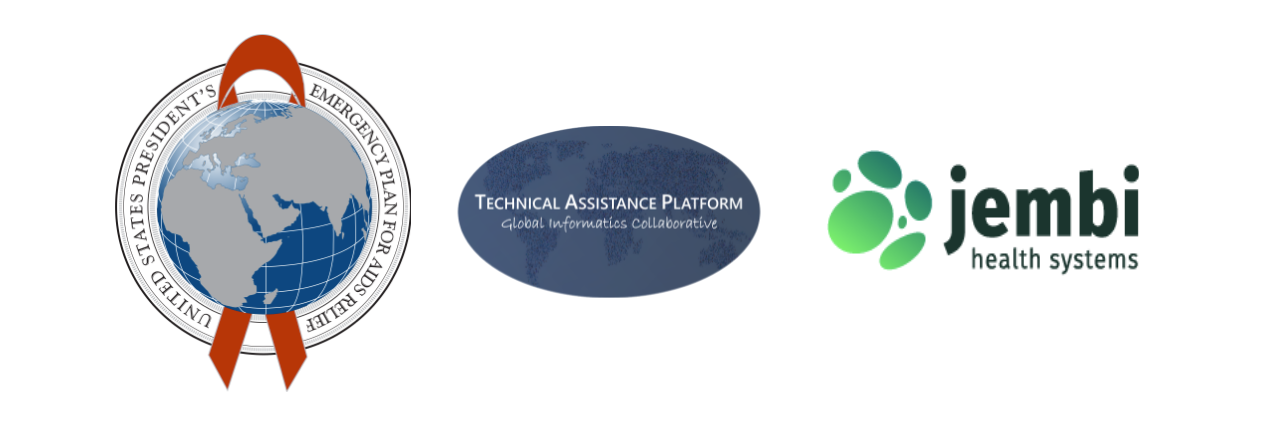

📝 <font color="red">NOTE: Please do not execute a run all command.

#**<font color="#007f68">Dataset Generator**

Research and development of novel techniques in areas such as data mining and record linkage commonly require real-world data for testing and evaluation of the accuracy, efficiency and effectiveness of these techniques. In areas and applications where the data include personal information, it is often difficult to acquire real data due to privacy and confidentiality concerns [2].

An alternative to using real data is to generate synthetic (or artificial) data which is based on real data [1, 5]. Such gen- erated data should exhibit similar statistical characteristics compared to the real data they are based on. For example, the generated values, their frequency distributions, and the occurrences and frequencies of typographical and other errors and variations should follow real data. Dependencies between elements of real data should also be modelled.

The methodological advantages of synthetic data are that [1, 5] (a) they can be generated with well defined frequency distributions, error characteristics and variations; (b) the status of which records have been generated based on each other is known, allowing for example to measure the accuracy of matching records when synthetic data are used for record linkage (generally not possible on real data because true matches are unknown); and (c) the generated data, as well as the generator program itself, can be published.

This section is optional, you can edit varibales to alter the output of the data-generator.

In [ ]:
#@title <font color="#18CF68"> Download Manual
from google.colab import files
import requests
from IPython.utils import io
def add_file(pck, url):
  with io.capture_output() as captured:
    r = requests.get(url)
    with open(pck, 'w') as f:
      f.write(r.text)

add_file("flex-data-gen-manual.pdf", "https://github.com/jembi/mpi-toolkit-notebook/blob/main/data-generator/GECO-Kenya/flex-data-gen-manual.pdf")
files.download("/content/flex-data-gen-manual.pdf")

##**<font color="#007f68"> How to use Notebook**


**Step 1:**
At the begining of each session run setup in section 1.

**Step 2 (optional):**
If you would like to modify any of the default variables run section 2 and use the interactive widgets to change the variables.

**Step 3 (optional):**
Run section 3 to view/download/upload the frequency files used to generate the records.

**Step 4:**
Run section 4 to generate data and view the generated data.

**Step 5:**  Run section 5 to download the generated data locally or to your Google Drive.

(Run though Steps 2-5 to generate more data files)  

  











## <font color="#007f68">Links to other MPI-toolkit Notebooks:
[Directory](https://colab.research.google.com/drive/1TqQ5sklvhw8I1f5m49ob-WTFfBtiElfs#scrollTo=M5NmyYErfDvt)

[Blocking](https://colab.research.google.com/drive/1fB6pa8Xu1cMdf1VmnTZ7bn5j-TS_ccRO#scrollTo=cbBPp8a-1ou5&forceEdit=true&sandboxMode=true)

[Fastlink R Linking](https://colab.research.google.com/drive/198Du0EOpaFODRmgLoIV_9a7XYYV2Um-u#scrollTo=isUSuVAs37Al)

[Fastlink R Deduplication Notebook](https://colab.research.google.com/drive/1xaItzOzYrv89OgI4VwXGhgIOn17lNhrQ)


## **<font color="#007f68">1) Notebook setup**

### <font color="#007f68"> Setup

In [10]:
#@title <font color="#18CF68">Clone the github Data Generator Repo from Github
!git clone https://github.com/jembi/mpi-toolkit-notebook.git
menu_list = ["Section 1 -Clone the github Data Generator Repo from Github", "Section 1 - Initial imports", "Section 1 - Set up Variables", 
             "Section 4 - Create file path", "Section 4 - Import Classes & Function Definitions", "Section 4 - Run Data Generator", "Section 4 - View Generated Data",
             "Section 5 - Download the Generated Data / Mount Drive", "Section 5 - Enter file path to desired destination for generated data", "Section 5 - Copy output file to drive"]
def tracker_err_msg(tracker, cell_id):
  print("Please execute code cell(s) from \n'" + menu_list[tracker + 1] + "' \nup to the \n'" + menu_list[cell_id] + "'\n cell before continuing!")
tracker = 0

Cloning into 'mpi-toolkit-notebook'...
remote: Enumerating objects: 1080, done.
remote: Counting objects: 100% (411/411), done.
remote: Compressing objects: 100% (395/395), done.
remote: Total 1080 (delta 186), reused 10 (delta 7), pack-reused 669
Receiving objects: 100% (1080/1080), 2.87 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (544/544), done.


In [11]:
#@title <font color="#18CF68"> Initial imports
cell_id = 1
if tracker >= (cell_id - 1):
  import pandas as pd
  import os
  import sys
  import shutil
  import ipywidgets as widgets
  from PIL import Image
  from google.colab import files
  import ipywidgets as widgets
  import numpy as np
  from ipywidgets import HBox, VBox, Dropdown, Button, FloatSlider, IntSlider, IntText, FloatText, BoundedIntText, Checkbox, Label
  %load_ext google.colab.data_table
  !pip install textdistance
  from textdistance import jaro_winkler
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

In [12]:
#@title <font color="#18CF68"> Set up Variables
cell_id = 2
if tracker >= (cell_id - 1):
  #Probability Distribution for Attributes
  given_name_val= 0.22
  family_name_val= 0.21
  gender_val=0.01
  dob_val=0.1
  city_val=0.1
  pn_val=0.17
  nid_val=0.19
  FN_G_check = Checkbox( value=True, description='First Name and Gender', disabled=False,indent=False)
  LN_check = Checkbox( value=True, description='Last Name', disabled=False,indent=False)
  C_check = Checkbox( value=True, description='City', disabled=False,indent=False)
  DOB_check = Checkbox( value=True, description='Date of Birth', disabled=False,indent=False)
  PN_check = Checkbox( value=True, description='Phone Number', disabled=False,indent=False)
  NID_check = Checkbox( value=True, description='National ID', disabled=False,indent=False)

  # Data Generator parameters 
  max_duplicate_per_record =  2 

  num_duplicates_distribution = 'zipf' 

  max_modification_per_attr = 1 

  num_modification_per_record = 4 

  #Given Name Corruptor

  missing_val_FN = 0.1 
  name_misspell_FN = 0.2 
  edit_FN = 0.2 
  ocr_FN = 0 
  keyboard_FN = 0.2 
  phonetic_FN = 0.3 

  #Family Name Corruptor

  missing_val_LN = 0.1 
  name_misspell_LN = 0.2 
  edit_LN = 0.2 
  ocr_LN = 0 
  keyboard_LN = 0.2 
  phonetic_LN = 0.3 

  #Gender at Birth Corruptor

  missing_val_GAB = 1 
  ocr_GAB = 0 
  keyboard_GAB = 0

  #Date of Birth Corruptor

  missing_val_DOB = 0.6 
  keyboard_DOB = 0.4 

  #City Corruptor

  missing_val_C = 1
  edit_C = 0 
  phonetic_C = 0


  #Phone Number Corruptor

  missing_val_PN = 0.2 
  edit_PN = 0.4 
  keyboard_PN = 0.4

  #National ID Corruptor

  missing_val_NID = 0.4 
  ocr_NID = 0 
  edit_NID = 0.4
  keyboard_NID = 0.2 

  number_of_originals =  1000 
  number_of_duplicates =  500
  def sum_list(list1):
    total = 0 
    for i in range(0, len(list1)):
      total = total + list1[i]
    return total
    
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

## **<font color="#007f68">2) Modify Variables [OPTIONAL]**

This section is optional, you can edit varibales to alter the output of the data-generator.

### <font color="#007f68"> Set Up Variables

In [ ]:
#@title <font color="#18CF68"> Record Variables to include
style = {'description_width': 'initial'}
layout = {'width': '400px'}

FN_G_check = Checkbox( value=True, description='First Name and Gender', disabled=False,indent=False)
LN_check = Checkbox( value=True, description='Last Name', disabled=False,indent=False)
C_check = Checkbox( value=True, description='City', disabled=False,indent=False)
DOB_check = Checkbox( value=True, description='Date of Birth', disabled=False,indent=False)
PN_check = Checkbox( value=True, description='Phone Number', disabled=False,indent=False)
NID_check = Checkbox( value=True, description='National ID', disabled=False,indent=False)


def check(*args):
  global given_name_val
  global family_name_val
  global gender_val
  global dob_val
  global city_val
  global pn_val
  global nid_val
  given_name_val= 0.22
  family_name_val= 0.21
  gender_val=0.01
  dob_val=0.1
  city_val=0.1
  pn_val=0.17
  nid_val=0.19
  check_list = []
  if FN_G_check.value == True:
    check_list.append("fn")
    check_list.append("gen")
  else:
    given_name_val= 0
    gender_val= 0
  if LN_check.value == True:
    check_list.append("ln")
  else:
    family_name_val= 0
  if C_check.value == True:
    check_list.append("city")
  else:
    city_val= 0
  if DOB_check.value == True:
    check_list.append("dob")
  else:
    dob_val= 0
  if PN_check.value == True:
    check_list.append("pn")
  else:
    pn_val= 0
  if NID_check.value == True:
    check_list.append("nid")
  else:
    nid_val= 0
  number_in_list = len(check_list)
  rand =np.random.dirichlet(np.ones(number_in_list))
  sum = sum_list(rand)
  while sum != 1.0:
    rand =np.random.dirichlet(np.ones(number_in_list))
    sum = sum_list(rand)
  for i in range(0 ,len(check_list)):
    if check_list[i] =="fn":
      given_name_val = round( rand[i], 2)
    elif check_list[i]=="ln":
      family_name_val = round( rand[i], 2)
    elif check_list[i]=="gen":
      gender_val = round( rand[i], 2)
    elif check_list[i]=="city":
      city_val = round( rand[i], 2)
    elif check_list[i]=="dob":
      dob_val = round( rand[i], 2)
    elif check_list[i]=="pn":
      pn_val = round( rand[i], 2)
    elif check_list[i]=="nid":
      nid_val = round( rand[i], 2)

FN_G_check.observe(check, names='value')
LN_check.observe(check, names='value')    
C_check.observe(check, names='value')
DOB_check.observe(check, names='value')    
PN_check.observe(check, names='value')
NID_check.observe(check, names='value')

VBox([FN_G_check, LN_check, C_check, DOB_check, PN_check, NID_check])

Change values below to your desired position and then click the Update button to set changes.

To reset the values to the default click the Reset button.

In [ ]:
#@title <font color="#18CF68">Data Generator Parameters
style = {'description_width': 'initial'}
layout = {'width': '400px'}

max_duplicate_per_record =  2 

num_duplicates_distribution = 'zipf' 

max_modification_per_attr = 1 

num_modification_per_record = 4 

max_duplicate_per_record_slider = IntSlider(description="Max duplicate per record", value=max_duplicate_per_record,style=style, layout=layout, min=1, max=10, step=1, disabled=False)

num_duplicates_distribution_drop = Dropdown(description="Duplicates Distribution", value=num_duplicates_distribution, style=style, layout=layout, options=["zipf", "poisson", "uniform"], disabled=False)

max_modification_per_attr_slider = IntSlider(description="Max modification per attribute", value=max_modification_per_attr, style=style, layout=layout, min=1, max=10, step=1, disabled=False)

num_modification_per_record_slider = IntSlider(description="Number of modifications per record", value=num_modification_per_record, style=style, layout=layout, min=1, max=7, step=1, disabled=False)

reset_button = Button(description="Reset", disabled=False)
def default_values(*args):

    # set values to default
    global max_duplicate_per_record 
    global num_duplicates_distribution 
    global max_modification_per_attr 
    global num_modification_per_record 
    max_duplicate_per_record =  2 
    num_duplicates_distribution = 'zipf' 
    max_modification_per_attr = 1 
    num_modification_per_record = 4 
    max_duplicate_per_record_slider.value =  2 
    num_duplicates_distribution_drop.value = 'zipf' 
    max_modification_per_attr_slider.value = 1 
    num_modification_per_record_slider.value = 4 

    print("Your choices are:\n{} max duplicates per record \n{} duplicate distribution \n{} max modifications per attributes and \n{} max modifications per record.".format(max_duplicate_per_record_slider.value , num_duplicates_distribution_drop.value, max_modification_per_attr_slider.value, num_modification_per_record_slider.value))


reset_button.on_click(default_values)

update_button = Button(description="Update", disabled=False)
def update_values(*args):
    if num_modification_per_record_slider.value >= max_modification_per_attr_slider.value:
        # set values to default
        global max_duplicate_per_record 
        global num_duplicates_distribution 
        global max_modification_per_attr 
        global num_modification_per_record
        max_duplicate_per_record =  max_duplicate_per_record_slider.value
        num_duplicates_distribution = num_duplicates_distribution_drop.value
        max_modification_per_attr = max_modification_per_attr_slider.value
        num_modification_per_record = num_modification_per_record_slider.value

        print("Your choices are:\n{} max duplicates per record \n{} duplicate distribution \n{} max modifications per attributes and \n{} max modifications per record.".format(max_duplicate_per_record_slider.value , num_duplicates_distribution_drop.value, max_modification_per_attr_slider.value, num_modification_per_record_slider.value))
    else:
        print("Failed to update: Number of modifications per record must be greater than or equal to maximum number of modifications per attribute")

update_button.on_click(update_values)


VBox([max_duplicate_per_record_slider, num_duplicates_distribution_drop, max_modification_per_attr_slider, num_modification_per_record_slider, update_button, reset_button])

Set how many original and how many duplicate records are to be generated. 

*This is optimised when the number of duplicates is half or less of the number of originals.*

In [ ]:
#@title <font color="#18CF68">Records

number_of_originals =  1000 
number_of_duplicates =  500

number_of_originals_int = BoundedIntText(description="Originals", value=number_of_originals, min=1, max=30000, step=1, disabled=False)
number_of_duplicates_int = BoundedIntText(description="Duplicates", value=number_of_duplicates, min=0, max=(number_of_originals_int.value*max_duplicate_per_record_slider.value), step=1, disabled=False)


reset_button = Button(description="Reset", disabled=False)

def check_max_dup(*args):
    global max_duplicate_per_record
    if(number_of_originals_int.value==0):
        max_bool=True
        print("Originals cannot be zero")
    else:
        x = (number_of_duplicates_int.value/number_of_originals_int.value)
        if(x > max_duplicate_per_record):
            print("Maximum Duplicates Exceeded")
            max_bool = True
        else:
            max_bool = False

    update_button.disabled=max_bool


def update_duplicate_int(*args):

    number_of_duplicates_int.max=(number_of_originals_int.value*max_duplicate_per_record_slider.value)



def default_values(*args):

    # set values to default
    global number_of_originals
    global number_of_duplicates
    number_of_originals =  1000 
    number_of_duplicates =  500
    number_of_originals_int.value  =  1000 
    number_of_duplicates_int.value  =  500
    print("Reset")

    #print(number_of_originals, number_of_duplicates)


reset_button.on_click(default_values)

update_button = Button(description="Update", disabled=False)

def update_values(*args):

    # set values to default
    global number_of_originals
    global number_of_duplicates
    number_of_originals =  number_of_originals_int.value
    number_of_duplicates = number_of_duplicates_int.value
    print("Updated")
    #print(number_of_originals, number_of_duplicates)

update_button.on_click(update_values)
number_of_originals_int.observe(update_duplicate_int, 'value')

#number_of_duplicates_int.observe(check_max_dup, 'value')    # just removing this, duplicate_int will always be limited to the number of duplicates allowed

VBox([number_of_originals_int, number_of_duplicates_int, update_button, reset_button])

Define the probability distribution of how likely an attribute will be selected for a modification.

Each of the given probability values must be between 0 and 1, and the sum of them must be 1.0 otherwise "Update" button will. not work.

If a probability is set to 0 for a certain attribute, then no modification will be applied on this attribute.

Change values below to your desired position and then click the Update button to set changes.

To reset the values to the default click the Reset button.

In [ ]:
#@title <font color="#18CF68">Modification probability distribution
# establish important values for later use
given_name_val= 0.22
family_name_val= 0.21
gender_val=0.01
dob_val=0.1
city_val=0.1
pn_val=0.17
nid_val=0.19


# create the 6 individual sliders
if FN_G_check.value == True:
  given_name_val_slider = FloatSlider(description="First Name", value=given_name_val, min=0, max=1, step=0.01)
  gender_val_slider = FloatSlider(description="Gender", value=gender_val, min=0, max=1, step=0.01)
else:
  given_name_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)
  gender_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)
if LN_check.value == True:
  family_name_val_slider = FloatSlider(description="Last Name", value=family_name_val, min=0, max=1, step=0.01)
else:
  family_name_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)
if DOB_check.value == True:
  dob_val_slider = FloatSlider(description="Date of Birth", value=dob_val, min=0, max=1, step=0.01)
else:
  dob_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)
if C_check.value == True:
  city_val_slider = FloatSlider(description="City", value=city_val, min=0, max=1, step=0.01)
else:
  city_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)
if PN_check.value == True:
  pn_val_slider = FloatSlider(description="Phone Num", value=pn_val, min=0, max=1, step=0.01)
else:
  pn_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)
if NID_check.value == True:
  nid_val_slider = FloatSlider(description="National ID", value=nid_val, min=0, max=1, step=0.01)
else:
  nid_val_slider = FloatSlider(description="----", value=0, min=0, max=1, step=0.01, disabled=True)

# total
col_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
col_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((col_total_slider, 'value'), (col_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
update_button = Button(description="Update", disabled=False)
reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((given_name_val_slider.value + family_name_val_slider.value + gender_val_slider.value + dob_val_slider.value + city_val_slider.value + pn_val_slider.value + nid_val_slider.value), 2)
    col_total_slider.value=total
    total_bool = (total != 1)
    update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global given_name_val
    global family_name_val
    global gender_val
    global dob_val
    global city_val
    global pn_val
    global nid_val
    if FN_G_check.value == True and LN_check.value == True and DOB_check.value == True and C_check.value == True and PN_check.value == True and NID_check.value == True:
      given_name_val= 0.22
      family_name_val= 0.21
      gender_val=0.01
      dob_val=0.1
      city_val=0.1
      pn_val=0.17
      nid_val=0.19
      given_name_val_slider.value = given_name_val
      family_name_val_slider.value = family_name_val
      gender_val_slider.value = gender_val
      dob_val_slider.value = dob_val
      city_val_slider.value = city_val
      pn_val_slider.value = pn_val 
      nid_val_slider.value = nid_val
    else:
      check_list = []
      if FN_G_check.value == True:
        check_list.append("fn")
        check_list.append("gen")
      else:
        given_name_val= 0
        gender_val=0
      if LN_check.value == True:
        check_list.append("ln")
      else:
        family_name_val= 0
      if C_check.value == True:
        check_list.append("city")
      else:
        city_val=0
      if DOB_check.value == True:
        check_list.append("dob")
      else:
        dob_val=0
      if PN_check.value == True:
        check_list.append("pn")
      else:
        pn_val=0
      if NID_check.value == True:
        check_list.append("nid")
      else:
        nid_val=0
      number_in_list = len(check_list)
      rand =np.random.dirichlet(np.ones(number_in_list))
      sum = sum_list(rand)
      while sum != 1.0:
        rand =np.random.dirichlet(np.ones(number_in_list))
        sum = sum_list(rand)
      for i in range(0 ,len(check_list)):
        if check_list[i] =="fn":
          given_name_val = round( rand[i], 2)
          given_name_val_slider.value = given_name_val
        elif check_list[i]=="ln":
          family_name_val = round( rand[i], 2)
          family_name_val_slider.value = family_name_val
        elif check_list[i]=="gen":
          gender_val = round( rand[i], 2)
          gender_val_slider.value = gender_val
        elif check_list[i]=="city":
          city_val = round( rand[i], 2)
          city_val_slider.value = city_val
        elif check_list[i]=="dob":
          dob_val = round( rand[i], 2)
          dob_val_slider.value = dob_val
        elif check_list[i]=="pn":
          pn_val = round( rand[i], 2)
          pn_val_slider.value = pn_val 
        elif check_list[i]=="nid":
          nid_val = round( rand[i], 2)
          nid_val_slider.value = nid_val
      given_name_val_slider.value = given_name_val
      family_name_val_slider.value = family_name_val
      gender_val_slider.value = gender_val
      dob_val_slider.value = dob_val
      city_val_slider.value = city_val
      pn_val_slider.value = pn_val 
      nid_val_slider.value = nid_val

    print("Reset")

    #print(given_name_val, family_name_val, gender_val, dob_val, city_val, pn_val, nid_val)

#reset values when clickd
reset_button.on_click(default_values)


def num_mod():
    global num_modification_per_record

    non_zero_count = 0

    for item in [given_name_val_slider.value, family_name_val_slider.value, gender_val_slider.value, 
      dob_val_slider.value, city_val_slider.value, pn_val_slider.value, nid_val_slider.value]:
      if item > 0:
          non_zero_count += 1

    return num_modification_per_record <= non_zero_count


def update_values(*args):
    if num_mod():
        # update the values
        global given_name_val
        global family_name_val
        global gender_val
        global dob_val
        global city_val
        global pn_val
        global nid_val
        if FN_G_check.value == True and LN_check.value == True and DOB_check.value == True and C_check.value == True and PN_check.value == True and NID_check.value == True:
          given_name_val= 0.22
          family_name_val= 0.21
          gender_val=0.01
          dob_val=0.1
          city_val=0.1
          pn_val=0.17
          nid_val=0.19
        else:
          if FN_G_check.value == True:
            given_name_val = given_name_val_slider.value
            gender_val = gender_val_slider.value
          else:
            given_name_val= 0
            gender_val=0
          if LN_check.value == True:
            family_name_val = family_name_val_slider.value
          else:
            family_name_val= 0
          if C_check.value == True:
            city_val = city_val_slider.value
          else:
            city_val=0
          if DOB_check.value == True:
            dob_val = dob_val_slider.value
          else:
            dob_val=0
          if PN_check.value == True:
            pn_val = pn_val_slider.value
          else:
            pn_val=0
          if NID_check.value == True:
            nid_val = nid_val_slider.value
          else:
            nid_val=0
        
        print("Updated")

        #print(given_name_val, family_name_val, gender_val, dob_val, city_val, pn_val, nid_val)
    else:
        print("Failed to update: Number of modifications per record ({}) require more attributes to be non-zero".format(num_modification_per_record))


# when slider or button is interacted with
update_button.on_click(update_values)

given_name_val_slider.observe(check_sum, 'value')
family_name_val_slider.observe(check_sum, 'value')
gender_val_slider.observe(check_sum, 'value')
dob_val_slider.observe(check_sum, 'value')
city_val_slider.observe(check_sum, 'value')
pn_val_slider.observe(check_sum, 'value')
nid_val_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider

if FN_G_check.value == False and LN_check.value == False and DOB_check.value == False and C_check.value == False and PN_check.value == False and NID_check.value == False:
  message = Label(value="WARNING!! No Variables Selected")
  vars = [message]
else:
  vars = [given_name_val_slider, family_name_val_slider, gender_val_slider, 
      dob_val_slider, city_val_slider, pn_val_slider, nid_val_slider, 
      col_total_box, 
      update_button, reset_button]

VBox(vars)

### <font color="#007f68"> Corruptors

📝  <font color="red"> NOTE: Please re-run Corruptor if the corresponding Record Variables is changed




Define the actual corruption (modification) methods that will be applied on the different attributes, then click the "Update" button to set changes.  

For each attribute, the sum of probabilities given must sum to 1.0 otherwise the "Update" button will not work. 

To reset the values to the default click the Reset button.

Types of errors:

**Missing Value (MV) - Empty identifiers.**

**Name Misspell (NM)- Example - use of nicknames instead of real names.**

**Edit - Wrong use of special characters and spaces**

**Optical Character Recognition (OCR) - The use of scanners to capture data often introduces errors.**

**Keyboard - transposition of keys and characters**

**Phonetic - Spelling errors when entering names because of phonetic interpretations.**

In [ ]:
#@title <font color="#18CF68">First Name Corruptor

# establish important values for later use
missing_val_FN = 0.1 
name_misspell_FN = 0.2
edit_FN = 0.2
ocr_FN = 0
keyboard_FN = 0.2
phonetic_FN = 0.3 

# create the 6 individual sliders
missing_val_FN_slider = FloatSlider(description="MV", value=missing_val_FN, min=0, max=1, step=0.01)
name_misspell_FN_slider = FloatSlider(description="NM", value=name_misspell_FN, min=0, max=1, step=0.01)
edit_FN_slider = FloatSlider(description="Edit", value=edit_FN, min=0, max=1, step=0.01)
ocr_FN_slider = FloatSlider(description="OCR", value=ocr_FN, min=0, max=1, step=0.01)
keyboard_FN_slider = FloatSlider(description="Keyboard", value=keyboard_FN, min=0, max=1, step=0.01)
phonetic_FN_slider = FloatSlider(description="Phonetic", value=phonetic_FN, min=0, max=1, step=0.01)

# total
name_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
name_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((name_total_slider, 'value'), (name_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
name_update_button = Button(description="Update", disabled=False)
name_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((missing_val_FN_slider.value + name_misspell_FN_slider.value + 
             edit_FN_slider.value + ocr_FN_slider.value + 
             keyboard_FN_slider.value + phonetic_FN_slider.value), 2)
    name_total_slider.value=total
    total_bool = (total != 1)
    name_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_FN 
    global name_misspell_FN
    global edit_FN
    global ocr_FN
    global keyboard_FN
    global phonetic_FN
    missing_val_FN = 0.1 
    name_misspell_FN = 0.2
    edit_FN = 0.2
    ocr_FN = 0
    keyboard_FN = 0.2
    phonetic_FN = 0.3 
    missing_val_FN_slider.value = missing_val_FN 
    name_misspell_FN_slider.value = name_misspell_FN 
    edit_FN_slider.value = edit_FN  
    ocr_FN_slider.value = ocr_FN  
    keyboard_FN_slider.value = keyboard_FN  
    phonetic_FN_slider.value = phonetic_FN 
    print("Reset")

    #print(missing_val_FN, name_misspell_FN, edit_FN, ocr_FN, keyboard_FN, phonetic_FN)

#reset values when clickd
name_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_FN 
    global name_misspell_FN
    global edit_FN
    global ocr_FN
    global keyboard_FN
    global phonetic_FN
    missing_val_FN = missing_val_FN_slider.value
    name_misspell_FN = name_misspell_FN_slider.value
    edit_FN = edit_FN_slider.value
    ocr_FN = ocr_FN_slider.value
    keyboard_FN = keyboard_FN_slider.value
    phonetic_FN = phonetic_FN_slider.value
    print("Updated")
    #print(missing_val_FN, name_misspell_FN, edit_FN, ocr_FN, keyboard_FN, phonetic_FN)

# when slider or button is interacted with
name_update_button.on_click(update_values)

missing_val_FN_slider.observe(check_sum, 'value')
name_misspell_FN_slider.observe(check_sum, 'value')
edit_FN_slider.observe(check_sum, 'value')
ocr_FN_slider.observe(check_sum, 'value')
keyboard_FN_slider.observe(check_sum, 'value')
phonetic_FN_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider

if FN_G_check.value==True:
  vars = [missing_val_FN_slider, name_misspell_FN_slider, edit_FN_slider, 
      ocr_FN_slider, keyboard_FN_slider, phonetic_FN_slider, 
      name_total_box, 
      name_update_button, name_reset_button]
else:
  message = Label(value="First Name Not Included")
  vars = [message]

VBox(vars)

In [ ]:
#@title <font color="#18CF68">Last Name Corruptor


# establish important values for later use
missing_val_LN = 0.1
name_misspell_LN = 0.2 
edit_LN = 0.2
ocr_LN = 0
keyboard_LN = 0.2 
phonetic_LN = 0.3

# create the 6 individual sliders
missing_val_LN_slider = FloatSlider(description="MV", value=missing_val_LN, min=0, max=1, step=0.01)
name_misspell_LN_slider = FloatSlider(description="NM", value=name_misspell_LN, min=0, max=1, step=0.01)
edit_LN_slider = FloatSlider(description="Edit", value=edit_LN, min=0, max=1, step=0.01)
ocr_LN_slider = FloatSlider(description="OCR", value=ocr_LN, min=0, max=1, step=0.01)
keyboard_LN_slider = FloatSlider(description="Keyboard", value=keyboard_LN, min=0, max=1, step=0.01)
phonetic_LN_slider = FloatSlider(description="Phonetic", value=phonetic_LN, min=0, max=1, step=0.01)

# total
family_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
family_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((family_total_slider, 'value'), (family_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
family_update_button = Button(description="Update", disabled=False)
family_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round ((missing_val_LN_slider.value + name_misspell_LN_slider.value + 
             edit_LN_slider.value + ocr_LN_slider.value + 
             keyboard_LN_slider.value + phonetic_LN_slider.value), 2)
    family_total_slider.value=total
    total_bool = (total != 1)
    family_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_LN 
    global name_misspell_LN
    global edit_LN
    global ocr_LN
    global keyboard_LN
    global phonetic_LN
    missing_val_LN = 0.1
    name_misspell_LN = 0.2 
    edit_LN = 0.2
    ocr_LN = 0
    keyboard_LN = 0.2 
    phonetic_LN = 0.3
    missing_val_LN_slider.value = missing_val_LN 
    name_misspell_LN_slider.value = name_misspell_LN 
    edit_LN_slider.value = edit_LN  
    ocr_LN_slider.value = ocr_LN  
    keyboard_LN_slider.value = keyboard_LN  
    phonetic_LN_slider.value = phonetic_LN  
    print("Reset")
    #print(missing_val_LN, name_misspell_LN, edit_LN, ocr_LN, keyboard_LN, phonetic_LN)

#reset values when clickd
family_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_LN 
    global name_misspell_LN
    global edit_LN
    global ocr_LN
    global keyboard_LN
    global phonetic_LN
    missing_val_LN = missing_val_LN_slider.value
    name_misspell_LN = name_misspell_LN_slider.value
    edit_LN = edit_LN_slider.value
    ocr_LN = ocr_LN_slider.value
    keyboard_LN = keyboard_LN_slider.value
    phonetic_LN = phonetic_LN_slider.value
    print("Updated")

    #print(missing_val_LN, name_misspell_LN, edit_LN, ocr_LN, keyboard_LN, phonetic_LN)

# when slider or button is interacted with
family_update_button.on_click(update_values)

missing_val_LN_slider.observe(check_sum, 'value')
name_misspell_LN_slider.observe(check_sum, 'value')
edit_LN_slider.observe(check_sum, 'value')
ocr_LN_slider.observe(check_sum, 'value')
keyboard_LN_slider.observe(check_sum, 'value')
phonetic_LN_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider

if LN_check.value==True:
  vars = [missing_val_LN_slider, name_misspell_LN_slider, edit_LN_slider, 
      ocr_LN_slider, keyboard_LN_slider, phonetic_LN_slider, family_total_box,
      family_update_button, family_reset_button]
else:
  message = Label(value="Last Name Not Included")
  vars = [message]

VBox(vars)

In [ ]:
#@title <font color="#18CF68">Gender Corruptor

# establish important values for later use
missing_val_GAB = 1
ocr_GAB = 0
keyboard_GAB = 0


# create the 6 individual sliders
missing_val_GAB_slider = FloatSlider(description="MV", value=missing_val_GAB, min=0, max=1, step=0.01)
ocr_GAB_slider = FloatSlider(description="OCR", value=ocr_GAB, min=0, max=1, step=0.01)
keyboard_GAB_slider = FloatSlider(description="Keyboard", value=keyboard_GAB, min=0, max=1, step=0.01)

# total
gob_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
gob_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((gob_total_slider, 'value'), (gob_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
gob_update_button = Button(description="Update", disabled=False)
gob_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((missing_val_GAB_slider.value + ocr_GAB_slider.value + 
             keyboard_GAB_slider.value), 2)
    gob_total_slider.value=total
    total_bool = (total != 1)
    gob_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_GAB 
    global ocr_GAB 
    global keyboard_GAB 
    missing_val_GAB = 1 
    ocr_GAB = 0 
    keyboard_GAB = 0
    missing_val_GAB_slider.value = missing_val_GAB 
    ocr_GAB_slider.value = ocr_GAB  
    keyboard_GAB_slider.value = keyboard_GAB  
    print("Reset")

    #print(missing_val_GAB, ocr_GAB, keyboard_GAB)

#reset values when clickd
gob_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_GAB 
    global ocr_GAB 
    global keyboard_GAB 
    missing_val_GAB = missing_val_GAB_slider.value
    ocr_GAB = ocr_GAB_slider.value
    keyboard_GAB = keyboard_GAB_slider.value
    print("Updated")

    #print(missing_val_GAB, ocr_GAB, keyboard_GAB)

# when slider or button is interacted with
gob_update_button.on_click(update_values)

missing_val_GAB_slider.observe(check_sum, 'value')
ocr_GAB_slider.observe(check_sum, 'value')
keyboard_GAB_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider

if FN_G_check.value==True:
  vars = [missing_val_GAB_slider, ocr_GAB_slider, keyboard_GAB_slider, gob_total_box,
      gob_update_button, gob_reset_button]
else:
  message = Label(value="Gender Not Included")
  vars = [message]

VBox(vars)


In [ ]:
#@title <font color="#18CF68">Date of Birth Corruptor

# establish important values for later use

missing_val_DOB = 0.6 
keyboard_DOB = 0.4 

# create the 6 individual sliders
missing_val_DOB_slider = FloatSlider(description="MV", value=missing_val_DOB, min=0, max=1, step=0.01)
keyboard_DOB_slider = FloatSlider(description="Keyboard", value=keyboard_DOB, min=0, max=1, step=0.01)

# total
dob_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
dob_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((dob_total_slider, 'value'), (dob_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
dob_update_button = Button(description="Update", disabled=False)
dob_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((missing_val_DOB_slider.value + keyboard_DOB_slider.value), 2)
    dob_total_slider.value=total
    total_bool = (total != 1)
    dob_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_DOB
    global keyboard_DOB 
    missing_val_DOB = 0.6 
    keyboard_DOB = 0.4 
    missing_val_DOB_slider.value = missing_val_DOB
    keyboard_DOB_slider.value = keyboard_DOB 
    print("Reset")

    #print(missing_val_DOB, keyboard_DOB)

#reset values when clickd
dob_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_DOB
    global keyboard_DOB 
    missing_val_DOB = missing_val_DOB_slider.value
    keyboard_DOB = keyboard_DOB_slider.value
    print("Update")

    #print(missing_val_DOB, keyboard_DOB)

# when slider or button is interacted with
dob_update_button.on_click(update_values)

missing_val_DOB_slider.observe(check_sum, 'value')
keyboard_DOB_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider

if DOB_check.value==True:
  vars = [missing_val_DOB_slider, keyboard_DOB_slider, dob_total_box,
      dob_update_button, dob_reset_button]
else:
  message = Label(value="Date of Birth Not Included")
  vars = [message]

VBox(vars)


In [ ]:
#@title <font color="#18CF68">City Corruptor

# establish important values for later use
missing_val_C = 1 
edit_C = 0 
phonetic_C = 0 


# create the 6 individual sliders
missing_val_C_slider = FloatSlider(description="MV", value=missing_val_C, min=0, max=1, step=0.01)
edit_C_slider = FloatSlider(description="Edit", value=edit_C, min=0, max=1, step=0.01)
phonetic_C_slider = FloatSlider(description="Phonetic", value=phonetic_C, min=0, max=1, step=0.01)

# total
city_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
city_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((city_total_slider, 'value'), (city_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
city_update_button = Button(description="Update", disabled=False)
city_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((missing_val_C_slider.value + edit_C_slider.value + 
             phonetic_C_slider.value), 2)
    city_total_slider.value=total
    total_bool = (total != 1)
    city_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_C 
    global edit_C 
    global phonetic_C
    missing_val_C = 1 
    edit_C = 0 
    phonetic_C = 0
    missing_val_C_slider.value = missing_val_C 
    edit_C_slider.value = edit_C  
    phonetic_C_slider.value = phonetic_C  
    print("Reset")

    #print(missing_val_C, edit_C, phonetic_C)

#reset values when clickd
city_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_C 
    global edit_C 
    global phonetic_C
    missing_val_C = missing_val_C_slider.value
    edit_C = edit_C_slider.value
    phonetic_C = phonetic_C_slider.value
    print("Updated")

    #print(missing_val_C, edit_C, phonetic_C)

# when slider or button is interacted with
city_update_button.on_click(update_values)

missing_val_C_slider.observe(check_sum, 'value')
edit_C_slider.observe(check_sum, 'value')
phonetic_C_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider

if C_check.value==True:
  vars = [missing_val_C_slider, edit_C_slider, phonetic_C_slider, city_total_box,
      city_update_button, city_reset_button]
else:
  message = Label(value="City Not Included")
  vars = [message]

VBox(vars)


In [ ]:
#@title <font color="#18CF68">Phone Number Corruptor

# establish important values for later use
missing_val_PN = 0.2 
edit_PN = 0.4 
keyboard_PN = 0.4


# create the 6 individual sliders
missing_val_PN_slider = FloatSlider(description="MV", value=missing_val_PN, min=0, max=1, step=0.01)
edit_PN_slider = FloatSlider(description="Edit", value=edit_PN, min=0, max=1, step=0.01)
keyboard_PN_slider = FloatSlider(description="Keyboard", value=keyboard_PN, min=0, max=1, step=0.01)

# total
phone_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
phone_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((phone_total_slider, 'value'), (phone_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
phone_update_button = Button(description="Update", disabled=False)
phone_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((missing_val_PN_slider.value + edit_PN_slider.value + 
             keyboard_PN_slider.value), 2)
    phone_total_slider.value=total
    total_bool = (total != 1)
    phone_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_PN 
    global edit_PN
    global keyboard_PN
    missing_val_PN = 0.2 
    edit_PN = 0.4 
    keyboard_PN = 0.4
    missing_val_PN_slider.value = missing_val_PN 
    edit_PN_slider.value = edit_PN  
    keyboard_PN_slider.value = keyboard_PN  
    print("Reset")

    #print(missing_val_PN, edit_PN, keyboard_PN)

#reset values when clickd
phone_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_PN 
    global edit_PN
    global keyboard_PN
    missing_val_PN = missing_val_PN_slider.value
    edit_PN = edit_PN_slider.value
    keyboard_PN = keyboard_PN_slider.value
    print("Updated")

    #print(missing_val_PN, edit_PN, keyboard_PN)

# when slider or button is interacted with
phone_update_button.on_click(update_values)

missing_val_PN_slider.observe(check_sum, 'value')
edit_PN_slider.observe(check_sum, 'value')
keyboard_PN_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
if PN_check.value==True:
  vars = [missing_val_PN_slider, edit_PN_slider, keyboard_PN_slider, phone_total_box,
        phone_update_button, phone_reset_button]
else:
  message = Label(value="Phone Number Not Included")
  vars = [message]

VBox(vars)

In [ ]:
#@title <font color="#18CF68">National ID

# establish important values for later use
missing_val_NID = 0.4 
ocr_NID = 0 
edit_NID = 0.4 
keyboard_NID = 0.2


# create the 6 individual sliders
missing_val_NID_slider = FloatSlider(description="MV", value=missing_val_NID, min=0, max=1, step=0.01)
ocr_NID_slider = FloatSlider(description="OCR", value=ocr_NID, min=0, max=1, step=0.01)
edit_NID_slider = FloatSlider(description="Edit", value=edit_NID, min=0, max=1, step=0.01)
keyboard_NID_slider = FloatSlider(description="Keyboard", value=keyboard_NID, min=0, max=1, step=0.01)

# total
id_total_slider = FloatSlider(description="Sum total", value=1, min=0, max=5, step=0.1, disabled=True)
id_total_box= FloatText(description="Sum total", continuous_update=True, disabled=True)
widgets.link((id_total_slider, 'value'), (id_total_box, 'value'))

# this button will update the important variables only when the sum of those variables equal to 1
id_update_button = Button(description="Update", disabled=False)
id_reset_button = Button(description="Reset", disabled=False)

def check_sum(*args):

    total = round((missing_val_NID_slider.value + ocr_NID_slider.value + 
             keyboard_NID_slider.value + edit_NID_slider.value), 2)
    id_total_slider.value=total
    total_bool = (total != 1)
    id_update_button.disabled=total_bool       # once all the values sum to 1, the update button is enabled

def default_values(*args):

    # set values to default
    global missing_val_NID
    global ocr_NID 
    global keyboard_NID
    global edit_NID
    missing_val_NID = 0.4 
    ocr_NID = 0 
    keyboard_NID = 0.2
    edit_NID = 0.4
    missing_val_NID_slider.value = missing_val_NID 
    ocr_NID_slider.value = ocr_NID  
    keyboard_NID_slider.value = keyboard_NID
    edit_NID_slider.value = edit_NID  
    print("Reset")

    #print(missing_val_NID, ocr_NID, keyboard_NID)

#reset values when clickd
id_reset_button.on_click(default_values)

def update_values(*args):

    # update the values
    global missing_val_NID
    global ocr_NID 
    global keyboard_NID
    global edit_NID
    missing_val_NID = missing_val_NID_slider.value
    ocr_NID = ocr_NID_slider.value
    keyboard_NID = keyboard_NID_slider.value
    edit_NID = edit_NID_slider.value 
    print("Updated")

    #print(missing_val_NID, ocr_NID, keyboard_NID, edit_NID)

# when slider or button is interacted with
id_update_button.on_click(update_values)

missing_val_NID_slider.observe(check_sum, 'value')
ocr_NID_slider.observe(check_sum, 'value')
keyboard_NID_slider.observe(check_sum, 'value')
edit_NID_slider.observe(check_sum, 'value')

# display vertically, not sure how to present the entire description of each slider
if PN_check.value==True:
  vars = [missing_val_NID_slider, edit_NID_slider, ocr_NID_slider, keyboard_NID_slider, id_total_box,
          id_update_button, id_reset_button]
else:
  message = Label(value="National ID Not Included")
  vars = [message]

VBox(vars)

## **<font color="#007f68">3) Data Generation Configuration [OPTIONAL]**

This section is optional, you can view, download and update Frequency Distribution Files.

###<font color="#007f68">View Frequency Distribution Files



This sections allows you to view the current lookup tables and replace then with your own csv files

In [ ]:
#@title <font color="#18CF68">Display City Frequency
city_freq =pd.read_csv("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv", header=None)
display(city_freq)

,0,1
0,Nairobi,28
1,Mombasa,8
2,Kisumu,5
3,Nakuru,4
4,Ruiru,3
...,...,...
98,Burnt Forest,1
99,Maragua,1
100,Kendu Bay,1
101,Ruai,1


In [ ]:
#@title <font color="#18CF68">Display Given Name & Gender Frequency
name_freq =pd.read_csv("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv", header=None)
display(name_freq) 

,0,1,2,3,4,5
0,John,75,Male,100,Female,1
1,Joseph,69,Male,100,Female,1
2,Mary,68,Male,1,Female,100
3,Faith,67,Male,1,Female,100
4,Mercy,67,Male,1,Female,100
...,...,...,...,...,...,...
996,Abdisalam,1,Male,50,Female,50
997,Deka,1,Male,50,Female,50
998,Ivone,1,Male,1,Female,100
999,Hawo,1,Male,50,Female,50


In [ ]:
#@title <font color="#18CF68">Display Family Name Frequency
name_m_freq =pd.read_csv("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv", header=None)
display(name_m_freq) 

,0,1
0,Otieno,90
1,Mohamed,81
2,Mwangi,78
3,Odhiambo,57
4,Maina,57
...,...,...
995,Kevin,1
996,Omweri,1
997,Maghanga,1
998,Nafuna,1


###<font color="#007f68"> Download Frequency Distribution Files

In [ ]:
#@title <font color="#18CF68">Download City Frequency file
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title <font color="#18CF68">Download Given Name Frequency file
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title <font color="#18CF68">Download Family Name Frequency file
files.download("/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###<font color="#007f68"> Update Frequency Distribution Files
⚠️ <font color="red">*WARNING! DO NOT RUN IF YOU ARE NOT CHANGING CSV FILES* ⚠️  

Upload the frequency CSV files you want to use. This will replace the original files with the ones you upload.

    The format of the City Name Frequency file is:
     # Comment lines start with the # character
     (Repeated city names will cause errors)

     The look-up file is a comma separated values (CSV) file which contains
     one type of row:
     Example:
      City_1,70
      City_2,10
      City_3,5
      City_4,10
      City_5,5
      ...


In [ ]:
#@title <font color="#18CF68">Upload City Name Frequency file
uploadCF = files.upload()

x =uploadCF.keys()
y = str(x)
z=y.strip("dict_keys([").strip("])").strip("'")

os.rename(z , "/content/city-freq.csv")

! rm "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv"

shutil.move("/content/city-freq.csv", "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files")

Saving city-freq.csv to city-freq.csv


'/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv'

     The format of the Given Name & Gender Frequency file is:
     # Comment lines start with the # character
     (Repeated female or male names will cause errors)

     Example:
      F_Name_1,8,female,1
      F_Name_2,7,female,1
      F_Name_3,7,female,1
      F_Name_4,7,female,1
      F_Name_5,6,female,1
      ...
      M_Name_1,26,male,1
      M_Name_2,26,male,1
      M_Name_3,23,male,1
      M_Name_4,21,male,1
      ...

💡 <font color="#34aeeb">Suggestion: The recommend minimum number of First Name and Gender variables used is 100

In [ ]:
#@title <font color="#18CF68">Upload First Name & Gender Frequency file
uploadFN = files.upload()

x =uploadFN.keys()
y = str(x)
z=y.strip("dict_keys([").strip("])").strip("'")

os.rename(z , "/content/given-name-gender-freq.csv")

! rm "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv"

shutil.move("/content/given-name-gender-freq.csv", "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files")

Saving given-name-gender-freq.csv to given-name-gender-freq.csv


'/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv'

    The format of the Family Name Frequency file is:
     # Comment lines start with the # character
     (Repeated family names will cause errors)

     The look-up file is a comma separated values (CSV) file which contains
     one type of row:
     Example:
      Family_Name_1,26
      Family_Name_2,26
      Family_Name_3,23
      Family_Name_4,21
      Family_Name_5,20

      ...


💡 <font color="#34aeeb">Suggestion: The recommend minimum number of Last Name variables used is 100

In [ ]:
#@title <font color="#18CF68">Upload Family Name Frequency file
uploadLN = files.upload()

x =uploadLN.keys()
y = str(x)
z=y.strip("dict_keys([").strip("])").strip("'")

os.rename(z , "/content/family-name-freq.csv")

! rm "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv"

shutil.move("/content/family-name-freq.csv", "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files")

Saving family-name-freq.csv to family-name-freq.csv


'/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv'

## **<font color="#007f68"> 4) Generate Data**



### <font color="#007f68">Create file path to allow for imports and import necessary classes & function definitions for data generator

In [13]:
#@title <font color="#18CF68">Create file path
cell_id = 3
if tracker >= (cell_id - 1):
  py_file_location = "/content/mpi-toolkit-notebook/data-generator/GECO-Kenya"
  sys.path.append(os.path.abspath(py_file_location))
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

In [14]:
#@title <font color="#18CF68">Import Classes & Function Definitions
cell_id = 4
if tracker >= (cell_id - 1):
  import random

  import attrgenfunct  # Functions to generate independent attribute values
  # Import the necessary other modules of the data generator
  #
  import basefunctions  # Helper functions
  import corruptor  # Main classes to corrupt attribute values and records
  import generator  # Main classes to generate records and the data set
  import output       # Main classes to output logs to a .txt file

  random.seed(42)  # Set seed for random generator, so data generation can
  #                       be repeated

  # -----------------------------------------------------------------------------
  # Define the attributes to be generated for this data set, and the data set
  # itself.
  #
  def get_attr_name_list():
      attr_name_list = []
      if FN_G_check.value == True and LN_check.value == True:
        ATTR_NAME = "first_name"  # IN
        ATTR_LAST_NAME = "last_name"  # IN
        ATTR_GENDER = "gender"  # IN
        attr_name_list.append(ATTR_NAME)
        attr_name_list.append(ATTR_LAST_NAME)
        attr_name_list.append(ATTR_GENDER)
      else:
        if FN_G_check.value == True:
          ATTR_NAME = "first_name"  # IN
          ATTR_GENDER = "gender"  # IN
          attr_name_list.append(ATTR_NAME)
          attr_name_list.append(ATTR_GENDER)
        if LN_check.value == True:
          ATTR_LAST_NAME = "last_name"  # IN
          attr_name_list.append(ATTR_LAST_NAME)
      if DOB_check.value == True:
        ATTR_DOB = "dob"  # IN
        attr_name_list.append(ATTR_DOB)
      if C_check.value == True:
        ATTR_CITY = "city"  # IN
        attr_name_list.append(ATTR_CITY)
      if PN_check.value == True:
        ATTR_PHONE_NUMBER = "phone_number"  # IN [optional]
        attr_name_list.append(ATTR_PHONE_NUMBER)
      if NID_check.value == True:
        ATTR_NATIONAL_ID = "national_id"  # IN [optional]
        attr_name_list.append(ATTR_NATIONAL_ID)
      return attr_name_list
      
  def get_attr_data_list():
      attr_data_list = []
      if FN_G_check.value == True:
        ATTR_NAME = "first_name"  # IN
        ATTR_GENDER = "gender"  # IN
        attr_data_list.append(generator.GenerateCateCateCompoundAttribute(
                                  categorical1_attribute_name=ATTR_NAME,
                                  categorical2_attribute_name=ATTR_GENDER,
                                  lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/given-name-gender-freq.csv',
                                  has_header_line=False,
                                  unicode_encoding=unicode_encoding_used))
      if LN_check.value == True:
        ATTR_LAST_NAME = "last_name"  # IN
        attr_data_list.append(generator.GenerateFreqAttribute(
                                  attribute_name=ATTR_LAST_NAME,
                                  freq_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/family-name-freq.csv',
                                  has_header_line=False,
                                  unicode_encoding=unicode_encoding_used))
      if DOB_check.value == True:
        ATTR_DOB = "dob"  # IN
        attr_data_list.append(generator.GenerateFuncAttribute(
                                  attribute_name=ATTR_DOB,
                                  function=attrgenfunct.generate_date_of_birth))
      if C_check.value == True:
        ATTR_CITY = "city"  # IN
        attr_data_list.append(generator.GenerateFreqAttribute(
                                  attribute_name=ATTR_CITY,
                                  freq_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/city-freq.csv',
                                  has_header_line=False,
                                  unicode_encoding=unicode_encoding_used))
      if PN_check.value == True:
        ATTR_PHONE_NUMBER = "phone_number"  # IN [optional]
        attr_data_list.append(generator.GenerateFuncAttribute(
                                  attribute_name=ATTR_PHONE_NUMBER,
                                      function=attrgenfunct.generate_phone_number_ethiopia))
      if NID_check.value == True:
        ATTR_NATIONAL_ID = "national_id"  # IN [optional]
        attr_data_list.append(generator.GenerateFuncAttribute(
                                  attribute_name=ATTR_NATIONAL_ID,
                                  function=attrgenfunct.generate_national_id_number))
      return attr_data_list

    # Define the probability distribution of how likely an attribute will be
    # selected for a modification.
    # Each of the given probability values must be between 0 and 1, and the sum of
    # them must be 1.0.
    # If a probability is set to 0 for a certain attribute, then no modification
    # will be applied on this attribute.
    #

  def get_attr_mod_prob_dictionary():
      attr_mod_prob_dictionary={}
      if FN_G_check.value == True and LN_check.value == True:
        ATTR_NAME = "first_name"  # IN
        ATTR_LAST_NAME = "last_name"  # IN
        ATTR_GENDER = "gender"  # IN
        attr_mod_prob_dictionary.update({ATTR_NAME : given_name_val})
        attr_mod_prob_dictionary.update({ATTR_LAST_NAME : family_name_val})
        attr_mod_prob_dictionary.update({ATTR_GENDER : gender_val})
      else:
        if FN_G_check.value == True:
          ATTR_NAME = "first_name"  # IN
          ATTR_GENDER = "gender"  # IN
          attr_mod_prob_dictionary.update({ATTR_NAME : given_name_val})
          attr_mod_prob_dictionary.update({ATTR_GENDER : gender_val})
        if LN_check.value == True:
          ATTR_LAST_NAME = "last_name"  # IN
          attr_mod_prob_dictionary.update({ATTR_LAST_NAME : family_name_val})
      if DOB_check.value == True:
        ATTR_DOB = "dob"  # IN
        attr_mod_prob_dictionary.update({ATTR_DOB : dob_val})
      if C_check.value == True:
        ATTR_CITY = "city"  # IN
        attr_mod_prob_dictionary.update({ATTR_CITY : city_val})
      if PN_check.value == True:
        ATTR_PHONE_NUMBER = "phone_number"  # IN
        attr_mod_prob_dictionary.update({ATTR_PHONE_NUMBER : pn_val})
      if NID_check.value == True:
        ATTR_NATIONAL_ID = "national_id"  # IN
        attr_mod_prob_dictionary.update({ATTR_NATIONAL_ID : nid_val})
      return attr_mod_prob_dictionary

    # Define the actual corruption (modification) methods that will be applied on
    # the different attributes.
    # For each attribute, the sum of probabilities given must sum to 1.0.
    #
  def get_attr_mod_data_dictionary():
      attr_mod_data_dictionary = {}
      if FN_G_check.value == True and LN_check.value == True:
        ATTR_NAME = "first_name"  # IN
        ATTR_LAST_NAME = "last_name"  # IN
        ATTR_GENDER = "gender"  # IN
        attr_mod_data_dictionary.update({ATTR_NAME : [(missing_val_FN, missing_val_corruptor),
                                                      (name_misspell_FN, name_misspell_corruptor),
                                                      (edit_FN, edit_corruptor2),
                                                      (ocr_FN, ocr_corruptor),
                                                      (keyboard_FN, keyboard_corruptor),
                                                      (phonetic_FN, phonetic_corruptor)]
                                        })
        attr_mod_data_dictionary.update({ATTR_LAST_NAME : [(missing_val_LN, missing_val_corruptor),
                                                            (name_misspell_LN, name_m_misspell_corruptor),
                                                            (edit_LN, edit_corruptor2),
                                                            (ocr_LN, ocr_corruptor),
                                                            (keyboard_LN, keyboard_corruptor),
                                                            (phonetic_LN, phonetic_corruptor)]
                                        })
        attr_mod_data_dictionary.update({ATTR_GENDER : [(missing_val_GAB, missing_val_corruptor),
                                                        (ocr_GAB, ocr_corruptor),
                                                        (keyboard_GAB, keyboard_corruptor)]
                                        })
      else:
        if FN_G_check.value == True:
          ATTR_NAME = "first_name"  # IN
          ATTR_GENDER = "gender"  # IN
          attr_mod_data_dictionary.update({ATTR_NAME : [(missing_val_FN, missing_val_corruptor),
                                                        (name_misspell_FN, name_misspell_corruptor),
                                                        (edit_FN, edit_corruptor2),
                                                        (ocr_FN, ocr_corruptor),
                                                        (keyboard_FN, keyboard_corruptor),
                                                        (phonetic_FN, phonetic_corruptor)]
                                          })
          attr_mod_data_dictionary.update({ATTR_GENDER : [(missing_val_GAB, missing_val_corruptor),
                                                          (ocr_GAB, ocr_corruptor),
                                                          (keyboard_GAB, keyboard_corruptor)]
                                          })
        if LN_check.value == True:
          ATTR_LAST_NAME = "last_name"  # IN
          attr_mod_data_dictionary.update({ATTR_LAST_NAME : [(missing_val_LN, missing_val_corruptor),
                                                            (name_misspell_LN, name_m_misspell_corruptor),
                                                            (edit_LN, edit_corruptor2),
                                                            (ocr_LN, ocr_corruptor),
                                                            (keyboard_LN, keyboard_corruptor),
                                                            (phonetic_LN, phonetic_corruptor)]
                                        })
      if DOB_check.value == True:
        ATTR_DOB = "dob"  # IN
        attr_mod_data_dictionary.update({ATTR_DOB : [(missing_val_DOB, missing_val_corruptor),
                                                    (keyboard_DOB, keyboard_corruptor)]
                                        })
      if C_check.value == True:
        ATTR_CITY = "city"  # IN
        attr_mod_data_dictionary.update({ATTR_CITY : [(missing_val_C, missing_val_corruptor),
                                                      (edit_C, edit_corruptor),
                                                      (phonetic_C, phonetic_corruptor)]
                                        })
      if PN_check.value == True:
        ATTR_PHONE_NUMBER = "phone_number"  # IN [optional]
        attr_mod_data_dictionary.update({ATTR_PHONE_NUMBER : [(missing_val_PN, missing_val_corruptor),
                                                              (edit_PN, edit_corruptor2),
                                                              (keyboard_PN, keyboard_corruptor)]
                                        })
      if NID_check.value == True:
        ATTR_NATIONAL_ID = "national_id"  # IN [optional]
        attr_mod_data_dictionary.update({ATTR_NATIONAL_ID : [(missing_val_PN, missing_val_corruptor),
                                                            (edit_PN, edit_corruptor2),
                                                            (keyboard_PN, keyboard_corruptor)]
                                        })
      return attr_mod_data_dictionary

  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

### <font color="#007f68"> Run the Data Generator & View Results

In [15]:
#@title <font color="#18CF68">Run Data Generator
cell_id = 5
if tracker >= (cell_id - 1):
  output.create_file()

  # Set the Unicode encoding for this data generation project. This needs to be
  # changed to another encoding for different Unicode character sets.
  # Valid encoding strings are listed here:
  # http://docs.python.org/library/codecs.html#standard-encodings
  #
  unicode_encoding_used = 'utf_8'

  # ascii was used previouisly but caused encoding errors 

  # The name of the record identifier attribute (unique value for each record).
  # This name cannot be given as name to any other attribute that is generated.
  #
  rec_id_attr_name = 'source_system_id'

  # Set how many original and how many duplicate records are to be generated.
  #

  num_org_rec = int(number_of_originals)
  num_dup_rec = int(number_of_duplicates)

  # Set the file name of the data set to be generated (this will be a comma
  # separated values, CSV, file).
  #
  out_file_name = 'data-{}-{}.csv'.format(num_org_rec, num_dup_rec)

  # Check if the given the unicode encoding selected is valid.
  #
  basefunctions.check_unicode_encoding_exists(unicode_encoding_used)

  # -----------------------------------------------------------------------------
  # Define how the generated records are to be corrupted (using methods from
  # the corruptor.py module).

  # For a value edit corruptor, the sum or the four probabilities given must
  # be 1.0.
  #
  edit_corruptor = \
      corruptor.CorruptValueEdit(
          position_function=corruptor.position_mod_normal,
          char_set_funct=basefunctions.char_set_ascii,
          insert_prob=0.5,
          delete_prob=0.5,
          substitute_prob=0.0,
          transpose_prob=0.0)

  edit_corruptor2 = \
      corruptor.CorruptValueEdit(
          position_function=corruptor.position_mod_uniform,
          char_set_funct=basefunctions.char_set_ascii,
          insert_prob=0.25,
          delete_prob=0.25,
          substitute_prob=0.25,
          transpose_prob=0.25)

  name_misspell_corruptor = \
      corruptor.CorruptCategoricalValue(
          lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/name-misspell.csv',
          has_header_line=False,
          unicode_encoding=unicode_encoding_used)

  name_m_misspell_corruptor = \
      corruptor.CorruptCategoricalValue(
          lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/name-m-misspell.csv',
          has_header_line=False,
          unicode_encoding=unicode_encoding_used)


  ocr_corruptor = corruptor.CorruptValueOCR(
      position_function=corruptor.position_mod_normal,
      lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/ocr-variations.csv',
      has_header_line=False,
      unicode_encoding=unicode_encoding_used)

  keyboard_corruptor = corruptor.CorruptValueKeyboard(
      position_function=corruptor.position_mod_normal,
      row_prob=0.5,
      col_prob=0.5)

  phonetic_corruptor = corruptor.CorruptValuePhonetic(
      lookup_file_name='/content/mpi-toolkit-notebook/data-generator/GECO-Kenya/lookup-files/phonetic-variations.csv',
      has_header_line=False,
      unicode_encoding=unicode_encoding_used)

  missing_val_corruptor = corruptor.CorruptMissingValue()


  # Nothing to change here - set-up the data set generation object.
  #
  test_data_generator = generator.GenerateDataSet(
      output_file_name=out_file_name,
      write_header_line=True,
      rec_id_attr_name=rec_id_attr_name,
      number_of_records=num_org_rec,
      attribute_name_list=get_attr_name_list(),
      attribute_data_list=get_attr_data_list(),
      unicode_encoding=unicode_encoding_used)

  # Nothing to change here - set-up the data set corruption object
  #
  test_data_corruptor = corruptor.CorruptDataSet(
      number_of_org_records=num_org_rec,
      number_of_mod_records=num_dup_rec,
      attribute_name_list=get_attr_name_list(),
      max_num_dup_per_rec=max_duplicate_per_record,
      num_dup_dist=num_duplicates_distribution,
      max_num_mod_per_attr=max_modification_per_attr,
      num_mod_per_rec=num_modification_per_record,
      attr_mod_prob_dict=get_attr_mod_prob_dictionary(),
      attr_mod_data_dict=get_attr_mod_data_dictionary())

  # =============================================================================
  # No need to change anything below here

  # Start the data generation process
  #
  rec_dict = test_data_generator.generate()

  # Check the number of generated records
  assert len(rec_dict) == num_org_rec

  # Corrupt (modify) the original records into duplicate records
  #
  rec_dict = test_data_corruptor.corrupt_records(rec_dict)

  # Check total number of records
  assert len(rec_dict) == num_org_rec + num_dup_rec

  # Write generate data into a file
  #
  test_data_generator.write()

  # End.
  # =============================================================================
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)


Generating 1 modified (duplicate) records for record "rec-00000357-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000870-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000160-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000322-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000784-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000614-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000281-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000791-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000029-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000012-aaa-0" 

Generating 2 modified (duplicate) records for record "rec-00000524-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000431-aaa-0" 

Generating 1 modified (duplicate) records for record "rec-00000680-aaa-0" 

Generating 2

In [16]:
#@title <font color="#18CF68">View Generated Data
cell_id = 6
if tracker >= (cell_id - 1):
  data =pd.read_csv(out_file_name)
  display(data)
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

,source_system_id,first_name,last_name,gender,dob,city,phone_number,national_id
0,rec-00000000-aaa-0,Lawrence,Okoth,Male,20000712,Kimilili,091-878-2264,198807187791339
1,rec-00000001-aaa-0,Ian,Abdi,Male,20040717,Kitale,098-111-5467,199603109286225
2,rec-00000002-aaa-0,Eric,Too,Male,19941127,Nanyuki,091-746-1496,200403155725983
3,rec-00000002-bbb-0,Eroc,Tu,Male,19941127,NaN,091-746-1496,20040315572t983
4,rec-00000003-aaa-0,Beryl,Kimani,Female,19991008,Maragua,011-452-9352,199803134803142
...,...,...,...,...,...,...,...,...
1495,rec-00000995-aaa-0,Michael,Hassan,Male,20030913,Mombasa,098-119-8093,199912136664118
1496,rec-00000996-aaa-0,Simon,Chepchirchir,Male,20100723,Kakamega,011-652-3288,199907117510975
1497,rec-00000997-aaa-0,Wanyonyi,Mohamud,Female,20091005,Kisii,011-111-3244,200102031515192
1498,rec-00000998-aaa-0,Nasimiyu,Kariuki,Female,20030202,Nairobi,091-499-9348,199303287035535


### <font color="#007f68"> View Generated Data Statistics

In [17]:
#@title <font color="#18CF68">View Record Statistics
#Split source system 
pd.options.mode.chained_assignment = None
df = data
df[['rec','recid','a_vs_b','copy_num']] = df['source_system_id'].str.split('-',expand=True)
datavs = get_attr_name_list()
list_split_head = ['recid', 'a_vs_b', 'copy_num']
final_list = list_split_head + datavs 
df =df[final_list]

#create df for aaa's and bbb's
dfa=df[df['a_vs_b'].str.contains("aaa")]
dfb=df[df['a_vs_b'].str.contains("bbb")]

#make true statements for originals and duplicates 
dfa['inOri'] = True 

dfb['inDup']= True

#merge some columns inOri-from aaa's , inDup & copy number from bbb's by recid using outerjoin
df_comb = dfa[['recid','inOri']].merge(dfb[['recid', 'copy_num','inDup']], how='outer', on='recid')

#make all NaN entries in inOri and inDup = false and in copy_num = NA

df_comb['inOri'].fillna(False ,inplace=True)

df_comb['inDup'].fillna(False ,inplace=True)

df_comb['copy_num'].fillna('NA',inplace=True)

#group and display results
df_record_details = df_comb.groupby(['inOri','inDup','copy_num']).agg('count').reset_index()
df_record_details  = df_record_details .rename(columns = {'recid': 'Count'}, inplace = False)
df_record_details  = df_record_details .rename(columns = {'inOri': 'In Original'}, inplace = False)
df_record_details  = df_record_details .rename(columns = {'inDup': 'In Duplicate'}, inplace = False)
df_record_details  = df_record_details .rename(columns = {'copy_num': 'Copy Number'}, inplace = False)
display(df_record_details)

,In Original,In Duplicate,Copy Number,Count
0,True,False,NA,651
1,True,True,0,349
2,True,True,1,151


In [18]:
#@title <font color="#18CF68">View Jaro Winkler Simmilarity Statistics

# transpose data and set inOri/inDup to true
res_ori =pd.melt(dfa, id_vars=['recid'], value_vars=datavs)

res_ori['inOri'] = True 

res_dup =pd.melt(dfb, id_vars=['recid'], value_vars=datavs)

res_dup['inDup'] = True
#rename columns
res_ori = res_ori.rename(columns = {'value': 'ori_value'}, inplace = False)
res_dup = res_dup.rename(columns = {'value': 'dup_value'}, inplace = False)

#merge ori and dup
df_comb2 = res_ori.merge(res_dup, left_on=['recid','variable'], right_on = ['recid','variable'])

#make NaN - NA
df_comb2['ori_value'].fillna('NA',inplace=True)
df_comb2['dup_value'].fillna('NA',inplace=True)

#Calculate JW
df_comb2['jw']=''
df_comb2['jw'] = [jaro_winkler(x, y) for x, y in zip(df_comb2['ori_value'], df_comb2['dup_value'])]


#JW categories
conditions = [
              (df_comb2['ori_value'] =='NA'),
              (df_comb2['dup_value'] =='NA'),
              (df_comb2['jw'] < 0.8),
              (df_comb2['jw'] < 0.85),
              (df_comb2['jw'] < 0.9),
              (df_comb2['jw'] < 0.95),
              (df_comb2['jw'] < 0.99999999),
              (df_comb2['jw'] == 1)]
choices = ['1. Source Missing', '2. Duplicate Missing', 
           '3. JW Similarity in 0.0-0.80', '4. JW Similarity in 0.80-0.85', 
           '5. JW Similarity in 0.85-0.90', '6. JW Similarity in 0.9-0.95', 
           '7. JW Similarity in 0.95-1.0', '8. Exact Match']

df_comb2['category'] = np.select(conditions, choices, default='')

#Group data
df_record_details2 = df_comb2.groupby(["variable", "category"]).agg('count').reset_index()
df_record_details2=df_record_details2.rename(columns = {'inDup': 'count'}, inplace = False)
df_record_details2=df_record_details2[['variable', 'category', 'count']]

#pivot data +display
df_pivot = df_record_details2.pivot(index='variable', columns='category', values='count')
df_pivot = df_pivot.fillna(0)

display(df_pivot)


category,2. Duplicate Missing,3. JW Similarity in 0.0-0.80,4. JW Similarity in 0.80-0.85,5. JW Similarity in 0.85-0.90,6. JW Similarity in 0.9-0.95,7. JW Similarity in 0.95-1.0,8. Exact Match
variable,,,,,,,
city,278.0,0.0,0.0,0.0,0.0,0.0,222.0
dob,154.0,0.0,1.0,5.0,38.0,72.0,230.0
first_name,52.0,17.0,7.0,64.0,143.0,113.0,104.0
gender,35.0,0.0,0.0,0.0,0.0,0.0,465.0
last_name,45.0,7.0,4.0,46.0,162.0,106.0,130.0
national_id,71.0,0.0,0.0,7.0,47.0,248.0,127.0
phone_number,84.0,0.0,0.0,2.0,54.0,138.0,222.0


In [19]:
#@title <font color="#18CF68">View Jaro Winkler Simmilarity Statistics Row Percentages
row_percent = round(df_pivot.div(df_pivot.sum(axis=1), axis=0)*100, 2)
display(row_percent)

category,2. Duplicate Missing,3. JW Similarity in 0.0-0.80,4. JW Similarity in 0.80-0.85,5. JW Similarity in 0.85-0.90,6. JW Similarity in 0.9-0.95,7. JW Similarity in 0.95-1.0,8. Exact Match
variable,,,,,,,
city,55.6,0.0,0.0,0.0,0.0,0.0,44.4
dob,30.8,0.0,0.2,1.0,7.6,14.4,46.0
first_name,10.4,3.4,1.4,12.8,28.6,22.6,20.8
gender,7.0,0.0,0.0,0.0,0.0,0.0,93.0
last_name,9.0,1.4,0.8,9.2,32.4,21.2,26.0
national_id,14.2,0.0,0.0,1.4,9.4,49.6,25.4
phone_number,16.8,0.0,0.0,0.4,10.8,27.6,44.4


## **<font color="#007f68"> 5) Results**

### <font color="#007f68">  Download the Generated Data

In [ ]:
#@title <font color="#18CF68">Download the Generated Data
cell_id = 7
if tracker >= (cell_id - 1):
  files.download(out_file_name) 
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <font color="#007f68"> Save the generated data to your Google Drive

Follow the link to get authorisation code to mount drive.

In [ ]:
#@title <font color="#18CF68"> Mount Drive
cell_id = 7
if tracker >= (cell_id - 1):
  from google.colab import drive
  drive.mount('/content/drive')
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

Mounted at /content/drive


In [ ]:
#@title <font color="#18CF68">Enter file path to desired destination for generated data 
cell_id = 8
if tracker >= (cell_id - 1):
  def file_search():

      # Create file if missing

      for file in os.listdir("/content/drive/MyDrive"):
          if 'Data Generator' in file:
              return True
      return False


  if file_search()==False:
    !mkdir "/content/drive/MyDrive/Data Generator"
  


  file_path = "/content/drive/MyDrive/Data Generator" #@param {type:"string"}
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)

In [ ]:
#@title <font color="#18CF68">Copy output file to drive
cell_id = 9
if tracker >= (cell_id - 1):
  shutil.copy(out_file_name, file_path)
  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id-1)
